In [46]:
import neptune
import seaborn as sns
import pandas as pd

In [16]:
session = neptune.sessions.Session()
project = session.get_project('andrzejzdobywca/pretrainingpp')

In [65]:
# ssl - ImageNet with semi supervised learning on Cifar
# clean - ImageNet
ids_ssl = [297, 298, 299, 309, 310, 311]
ids_clean = [294, 295, 296, 306, 307, 308]

# add the prefix
ids_ssl = ['PRET-{}'.format(i) for i in ids_ssl]
ids_clean = ['PRET-{}'.format(i) for i in ids_clean]
print(ids_ssl)
print(ids_clean)

['PRET-297', 'PRET-298', 'PRET-299', 'PRET-309', 'PRET-310', 'PRET-311']
['PRET-294', 'PRET-295', 'PRET-296', 'PRET-306', 'PRET-307', 'PRET-308']


In [68]:
exps_ssl = project.get_experiments(ids_ssl)
exps_clean = project.get_experiments(ids_clean)

In [84]:
data_ssl = pd.concat([exp.get_numeric_channels_values('val_acc') for exp in exps_ssl])
data_ssl['type'] = 'ssl'
data_clean = pd.concat([exp.get_numeric_channels_values('val_acc') for exp in exps_clean])
data_clean['type'] = 'clean'

data = pd.concat([data_ssl, data_clean])
data = data.rename(columns={"x": "epoch"})
print(data)

    epoch  val_acc   type
0     0.0   0.7013    ssl
1     1.0   0.7320    ssl
2     2.0   0.7265    ssl
3     3.0   0.7345    ssl
4     4.0   0.7410    ssl
..    ...      ...    ...
75   75.0   0.7527  clean
76   76.0   0.7495  clean
77   77.0   0.7434  clean
78   78.0   0.7535  clean
79   79.0   0.7518  clean

[960 rows x 3 columns]


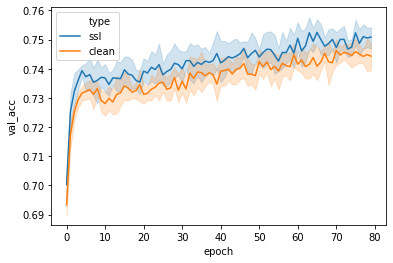

In [85]:
ax = sns.lineplot(x="epoch", y="val_acc", hue='type', data=data)